In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [7]:

base_url = "http://api.openweathermap.org/data/2.5/weather?q=" 
weather_data = []
counter = 0
for city in cities:
    try:
        response = requests.get(base_url + city + "&appid=" + api_key).json()
        weather_data.append(response)
        
        counter = counter + 1
        print(f"City # {counter} : {response['name']}")
    except:
        print(f"City not found, skipping...")
        

City # 1 : Qaanaaq
City not found, skipping...
City # 3 : Georgetown
City # 4 : Katsuura
City # 5 : Pisco
City not found, skipping...
City # 7 : Ordzhonikidze
City # 8 : Hermanus
City # 9 : Ushuaia
City # 10 : Springfield
City # 11 : Tooele
City # 12 : Jamestown
City # 13 : Mataura
City # 14 : Petropavlovsk-Kamchatskiy
City # 15 : Nioro
City # 16 : Airai
City # 17 : Karratha
City # 18 : Storforshei
City # 19 : Busselton
City # 20 : Rikitea
City not found, skipping...
City # 22 : Ercis
City # 23 : Vaini
City # 24 : Punta Arenas
City # 25 : Bluff
City # 26 : Bubaque
City # 27 : Ossora
City # 28 : Geraldton
City # 29 : Kaohsiung
City # 30 : Sakaraha
City # 31 : New Norfolk
City # 32 : Aitape
City not found, skipping...
City # 34 : Athabasca
City # 35 : Puerto Ayora
City # 36 : Kalabo
City # 37 : Horsham
City # 38 : Bom Jesus
City # 39 : Naze
City # 40 : Vardo
City # 41 : Souillac
City # 42 : Albany
City # 43 : Frutal
City # 44 : Salinopolis
City # 45 : Jitotol
City # 46 : Tlacotepec
City 

City # 367 : Coquimbo
City # 368 : Bonthe
City # 369 : Leh
City # 370 : Prince Rupert
City not found, skipping...
City # 372 : Makakilo City
City # 373 : Jalostotitlan
City # 374 : Ratnagiri
City # 375 : Zhezkazgan
City # 376 : Port Blair
City # 377 : Arlit
City # 378 : Port Lincoln
City not found, skipping...
City # 380 : Ribeirao Bonito
City # 381 : Honiara
City # 382 : Canutama
City # 383 : Guerrero Negro
City # 384 : Mercedes
City # 385 : Lumsden
City # 386 : Mikhaylovka
City # 387 : Alexandria
City # 388 : Mehamn
City # 389 : North Bend
City # 390 : Wakkanai
City # 391 : Acapulco
City # 392 : Bara
City # 393 : Birjand
City # 394 : Teguise
City # 395 : Dwarka
City not found, skipping...
City # 397 : Cabedelo
City # 398 : Port Hardy
City # 399 : Gourcy
City # 400 : Yatou
City # 401 : Faanui
City # 402 : Longyearbyen
City # 403 : Homer
City # 404 : Gat
City not found, skipping...
City not found, skipping...
City # 407 : Tabuk
City # 408 : Thompson
City # 409 : Horta
City # 410 : Bali

In [9]:
pd.DataFrame(weather_data).head()

,base,clouds,cod,coord,dt,id,main,message,name,rain,sys,visibility,weather,wind
0,stations,{'all': 12},200,"{'lon': -69.36, 'lat': 77.48}",1.540177e+09,3831208.0,"{'temp': 256.904, 'pressure': 994.97, 'humidit...",NaN,Qaanaaq,NaN,"{'message': 0.0038, 'country': 'GL', 'sunrise'...",NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 3.47, 'deg': 96.5003}"
1,NaN,NaN,404,NaN,NaN,NaN,NaN,city not found,NaN,NaN,NaN,NaN,NaN,NaN
2,stations,{'all': 40},200,"{'lon': -58.16, 'lat': 6.8}",1.540174e+09,3378644.0,"{'temp': 299.15, 'pressure': 1008, 'humidity':...",NaN,Georgetown,NaN,"{'type': 1, 'id': 4343, 'message': 0.0054, 'co...",10000.0,"[{'id': 211, 'main': 'Thunderstorm', 'descript...","{'speed': 2.1, 'deg': 60}"
3,stations,{'all': 75},200,"{'lon': 134.5, 'lat': 33.93}",1.540174e+09,1865309.0,"{'temp': 293.15, 'pressure': 1022, 'humidity':...",NaN,Katsuura,NaN,"{'type': 1, 'id': 7587, 'message': 0.004, 'cou...",10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",{'speed': 1}
4,stations,{'all': 0},200,"{'lon': -76.2, 'lat': -13.71}",1.540174e+09,3932145.0,"{'temp': 291.15, 'pressure': 1013, 'humidity':...",NaN,Pisco,NaN,"{'type': 1, 'id': 4405, 'message': 0.0031, 'co...",10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 6.7, 'deg': 210}"


In [37]:
columns = ["City", "Country", "Latitude", "Longitude", "Cloudiness", "Humidity", "Temperature", "Wind Speed", "Date"]
city_df = pd.DataFrame(columns = columns)
cities = []
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temp = []
wind = []
i = 0
while i < len(weather_data):
   while weather_data[i]['cod'] == '404':
       weather_data.pop(i)
      
   else:
    cities.append(weather_data[i]['name'])
    country.append(weather_data[i]['sys']['country'])
    latitude.append(weather_data[i]['coord']['lat'])
    longitude.append(weather_data[i]['coord']['lon'])
    clouds.append(weather_data[i]['clouds']['all'])
    humidity.append(weather_data[i]['main']['humidity'])
    temp.append(weather_data[i]['main']['temp_max'])
    wind.append(weather_data[i]['wind']['speed'])
    date.append(weather_data[i]['dt'])
    i += 1
len(weather_data)
city_df["City"] = cities
city_df["Country"] = country
city_df["Latitude"] = latitude
city_df["Longitude"] = longitude
city_df["Cloudiness"] = clouds
city_df["Humidity"] = humidity
city_df["Temperature"] = temp
city_df["Wind Speed"] = wind
city_df["Date"] = date
city_df.to_csv('city_df.csv')
city_df.head()

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Temperature,Wind Speed,Date
0,Qaanaaq,GL,77.48,-69.36,12,100,256.904,3.47,1540176995
1,Georgetown,GY,6.80,-58.16,40,88,299.150,2.10,1540173600
2,Katsuura,JP,33.93,134.50,75,64,293.150,1.00,1540173600
3,Pisco,PE,-13.71,-76.20,0,82,291.150,6.70,1540173600
4,Ordzhonikidze,UA,44.96,35.36,88,100,287.379,3.12,1540176996


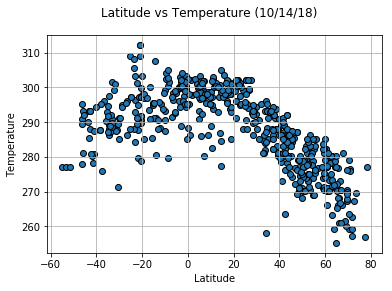

In [25]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.suptitle('Latitude vs Temperature (10/14/18)')
plt.savefig('temp.png')

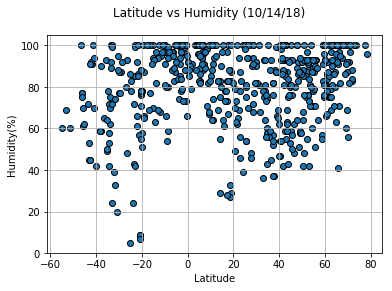

In [26]:
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.suptitle('Latitude vs Humidity (10/14/18)')
plt.savefig('humid.png')

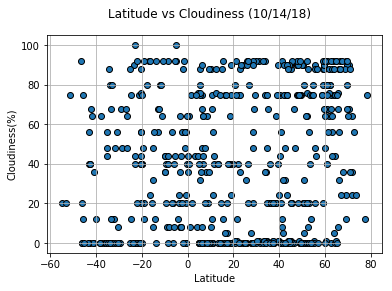

In [27]:

plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.suptitle('Latitude vs Cloudiness (10/14/18)')
plt.savefig('cloud.png')

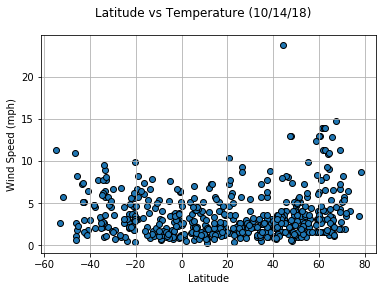

In [28]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.suptitle('Latitude vs Temperature (10/14/18)')
plt.savefig('wind.png')
